In [2]:
import chardet

files = ['cpdg2021.csv', 'cpdg2022.csv', 'cpdg2023.csv', 'cpdg2024.csv']

for file in files:
    with open(file, 'rb') as f:
        result = chardet.detect(f.read(100000))
        print(f"{file}: {result['encoding']}")


cpdg2021.csv: Windows-1252
cpdg2022.csv: Windows-1252
cpdg2023.csv: Windows-1252
cpdg2024.csv: Windows-1252


In [3]:
import pandas as pd

files = ['cpdg2021.csv', 'cpdg2022.csv', 'cpdg2023.csv', 'cpdg2024.csv']
dfs = []

for file in files:
    df = pd.read_csv(file, encoding='windows-1252', sep=';')  # Gunakan delimiter yang benar
    dfs.append(df)

# Gabungkan semua data menjadi satu DataFrame
df_final = pd.concat(dfs, ignore_index=True)

# Tampilkan beberapa baris pertama untuk memastikan data terbaca dengan benar
print(df_final.head())



  Point Id  From Station Stored Status Solution Type Solution Optimisation  \
0     cpdg           NaN        Stored     Navigated        Iono Minimised   
1     cpdg           NaN        Stored     Navigated        Iono Minimised   
2     cpdg           NaN        Stored     Navigated        Iono Minimised   
3     cpdg           NaN        Stored     Navigated        Iono Minimised   
4     cpdg           NaN        Stored     Navigated        Iono Minimised   

  Satellite System Frequency Occupation Mode        Start Time  \
0              GPS     L1/L2          Static  01/01/2021 06:59   
1              GPS     L1/L2          Static  01/02/2021 06:59   
2              GPS     L1/L2          Static  01/03/2021 06:59   
3              GPS     L1/L2          Static  01/04/2021 06:59   
4      GPS/GLONASS     L1/L2          Static  01/05/2021 06:59   

           End Time  ... WGS84 Longitude [°]  WGS84 Ellip. Height [m]  \
0  01/02/2021 06:59  ...   100° 21' 47.21" E                 

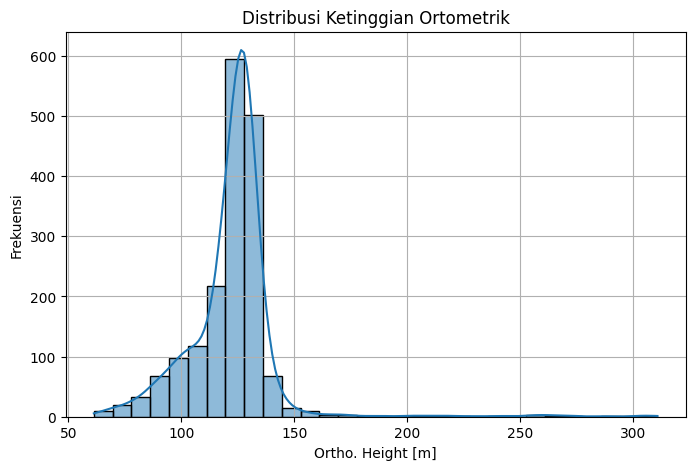

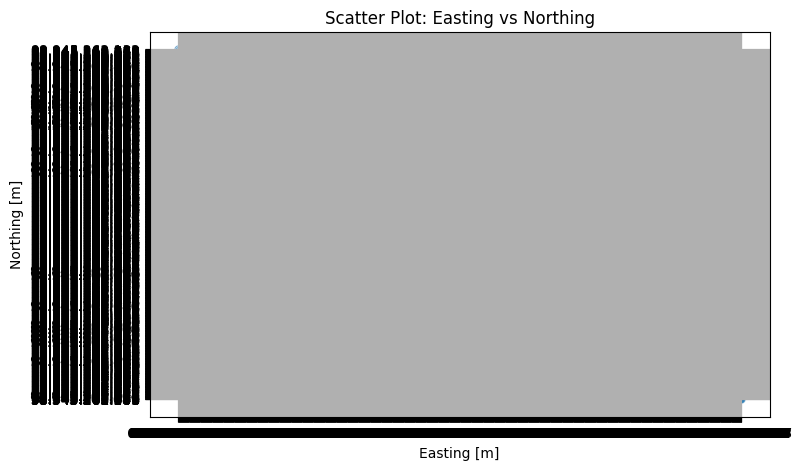

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi 1: Histogram untuk distribusi ketinggian ortometrik
plt.figure(figsize=(8, 5))
sns.histplot(df_final['Ortho. Height [m]'], bins=30, kde=True)
plt.title("Distribusi Ketinggian Ortometrik")
plt.xlabel("Ortho. Height [m]")
plt.ylabel("Frekuensi")
plt.grid()
plt.show()

# Visualisasi 2: Scatter plot untuk hubungan antara Easting dan Northing
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_final['Easting [m]'], y=df_final['Northing [m]'], alpha=0.5)
plt.title("Scatter Plot: Easting vs Northing")
plt.xlabel("Easting [m]")
plt.ylabel("Northing [m]")
plt.grid()
plt.show()


In [5]:
df.columns = df.columns.str.strip().str.replace(r'[^a-zA-Z0-9\s\[\]._-]', '', regex=True)
print("Kolom setelah dibersihkan:", df.columns)


Kolom setelah dibersihkan: Index(['Point Id', 'From Station', 'Stored Status', 'Solution Type',
       'Solution Optimisation', 'Satellite System', 'Frequency',
       'Occupation Mode', 'Start Time', 'End Time', 'Duration',
       'Antenna Height [m]', 'Antenna Name', 'Ephemeris Type', 'Easting [m]',
       'Northing [m]', 'Ortho. Height [m]', 'Geoid Separation [m]',
       'WGS84 Latitude []', 'WGS84 Longitude []', 'WGS84 Ellip. Height [m]',
       'WGS84 Cartesian X [m]', 'WGS84 Cartesian Y [m]',
       'WGS84 Cartesian Z [m]', 'x [m]', 'y [m]', 'z [m]', 'Slope Dist. [m]',
       'SD Slope Dist. [m]'],
      dtype='object')


In [6]:
df = df[['Point Id', 'Start Time', 'WGS84 Latitude []', 'WGS84 Longitude []', 
         'Easting [m]', 'Northing [m]', 'Ortho. Height [m]', 
         'WGS84 Ellip. Height [m]', 'Geoid Separation [m]']]


In [7]:
print(df.columns.tolist())  # Lihat semua nama kolom setelah dibersihkan


['Point Id', 'Start Time', 'WGS84 Latitude []', 'WGS84 Longitude []', 'Easting [m]', 'Northing [m]', 'Ortho. Height [m]', 'WGS84 Ellip. Height [m]', 'Geoid Separation [m]']


In [8]:
print(df.columns.tolist())


['Point Id', 'Start Time', 'WGS84 Latitude []', 'WGS84 Longitude []', 'Easting [m]', 'Northing [m]', 'Ortho. Height [m]', 'WGS84 Ellip. Height [m]', 'Geoid Separation [m]']


In [9]:
df = df[['Point Id', 'Start Time', 'WGS84 Latitude []', 'WGS84 Longitude []', 
         'Easting [m]', 'Northing [m]', 'Ortho. Height [m]', 
         'WGS84 Ellip. Height [m]', 'Geoid Separation [m]']]


In [10]:
df.columns = df.columns.str.strip()  # Hilangkan spasi berlebih
df.columns = df.columns.str.replace(r'[^\w\s\[\]]', '', regex=True)  # Bersihkan karakter aneh
print(df.columns.tolist())  # Cek lagi nama kolom setelah dibersihkan


['Point Id', 'Start Time', 'WGS84 Latitude []', 'WGS84 Longitude []', 'Easting [m]', 'Northing [m]', 'Ortho Height [m]', 'WGS84 Ellip Height [m]', 'Geoid Separation [m]']


In [11]:
df = df[['Point Id', 'Start Time', 'WGS84 Latitude []', 'WGS84 Longitude []', 
         'Easting [m]', 'Northing [m]', 'Ortho Height [m]', 
         'WGS84 Ellip Height [m]', 'Geoid Separation [m]']]


In [12]:
# Cek ringkasan statistik
print(df.describe())

# Cek missing values
print(df.isnull().sum())


       Ortho Height [m]  WGS84 Ellip Height [m]  Geoid Separation [m]
count        179.000000              179.000000            179.000000
mean         126.794201               61.146709            -65.647570
std            5.316798                5.316826              0.000496
min          116.157000               50.510000            -65.648000
25%          123.252000               57.604500            -65.648000
50%          125.772000               60.125000            -65.648000
75%          130.261500               64.613500            -65.647000
max          142.188000               76.541000            -65.647000
Point Id                  0
Start Time                0
WGS84 Latitude []         0
WGS84 Longitude []        0
Easting [m]               0
Northing [m]              0
Ortho Height [m]          0
WGS84 Ellip Height [m]    0
Geoid Separation [m]      0
dtype: int64


In [13]:
import re

def dms_to_dd(dms_str):
    """Konversi koordinat dari format DMS ke Decimal Degrees (DD)"""
    dms_str = dms_str.strip()
    match = re.match(r'(\d+)° (\d+)\'.*?([\d.]+)\" (\w)', dms_str)
    
    if match:
        degrees, minutes, seconds, direction = match.groups()
        dd = float(degrees) + float(minutes)/60 + float(seconds)/3600
        if direction in ['S', 'W']:  # South dan West negatif
            dd *= -1
        return dd
    else:
        return None  # Kalau format salah, biarkan kosong

# Terapkan ke kolom Latitude & Longitude
df['WGS84 Latitude []'] = df['WGS84 Latitude []'].apply(dms_to_dd)
df['WGS84 Longitude []'] = df['WGS84 Longitude []'].apply(dms_to_dd)

# Cek apakah konversi berhasil
print(df[['WGS84 Latitude []', 'WGS84 Longitude []']].head())


   WGS84 Latitude []  WGS84 Longitude []
0          -0.953981          100.363117
1          -0.953981          100.363117
2          -0.953981          100.363114
3          -0.953981          100.363114
4          -0.953981          100.363114


In [14]:
# Fungsi untuk membersihkan angka yang memiliki format titik pemisah ribuan
def convert_to_float(value):
    try:
        # Hapus pemisah ribuan (titik) lalu ubah ke float
        return float(str(value).replace('.', '').replace(',', '.'))
    except ValueError:
        return None  # Jika gagal, isi dengan NaN

# Terapkan ke semua kolom numerik
numeric_columns = ['Easting [m]', 'Northing [m]', 'Ortho Height [m]', 'WGS84 Ellip Height [m]', 'Geoid Separation [m]']
df[numeric_columns] = df[numeric_columns].applymap(convert_to_float)

# Cek apakah masih ada data string
print(df.dtypes)


Point Id                   object
Start Time                 object
WGS84 Latitude []         float64
WGS84 Longitude []        float64
Easting [m]               float64
Northing [m]              float64
Ortho Height [m]          float64
WGS84 Ellip Height [m]    float64
Geoid Separation [m]      float64
dtype: object


C:\Users\User\AppData\Local\Temp\ipykernel_10608\3629833063.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[numeric_columns] = df[numeric_columns].applymap(convert_to_float)


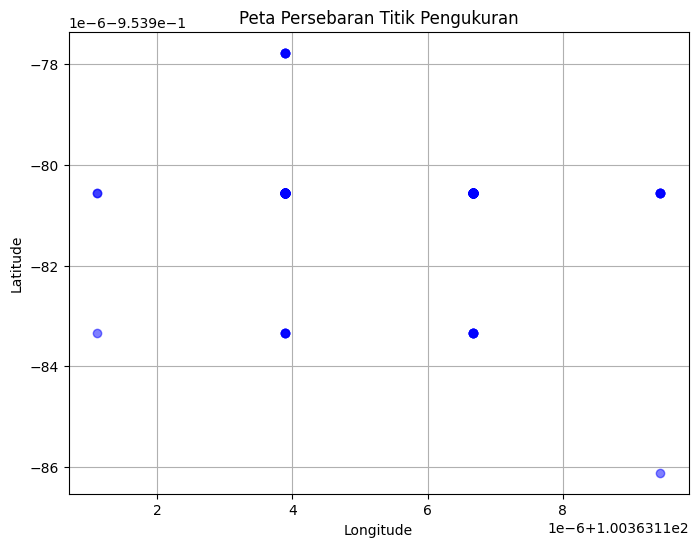

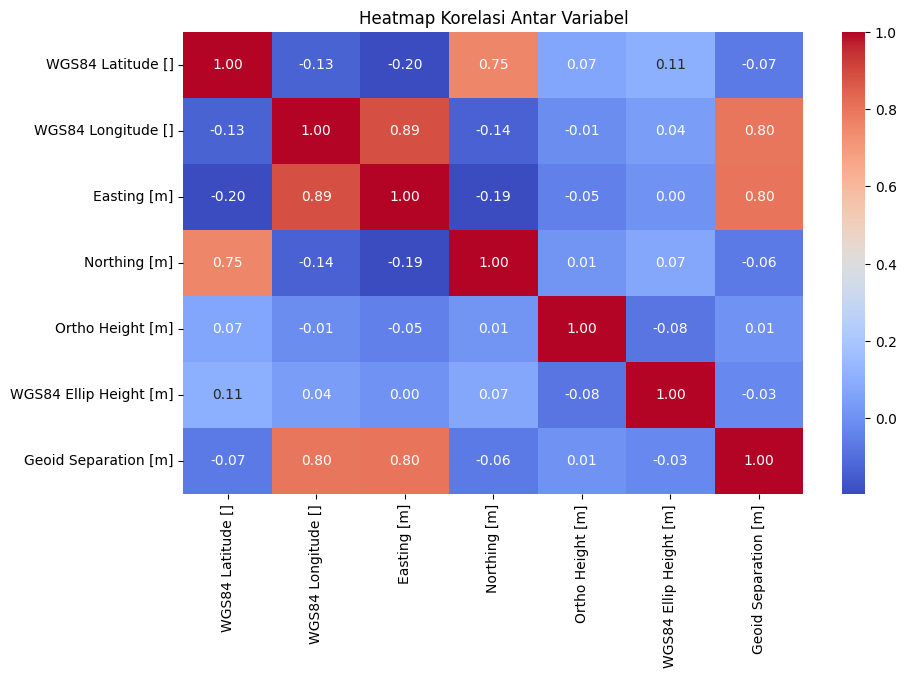

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatterplot lokasi berdasarkan Latitude & Longitude
plt.figure(figsize=(8,6))
plt.scatter(df['WGS84 Longitude []'], df['WGS84 Latitude []'], c='blue', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Peta Persebaran Titik Pengukuran')
plt.grid()
plt.show()

# Heatmap Korelasi Antar Variabel
plt.figure(figsize=(10,6))
sns.heatmap(df.drop(columns=['Point Id', 'Start Time']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()


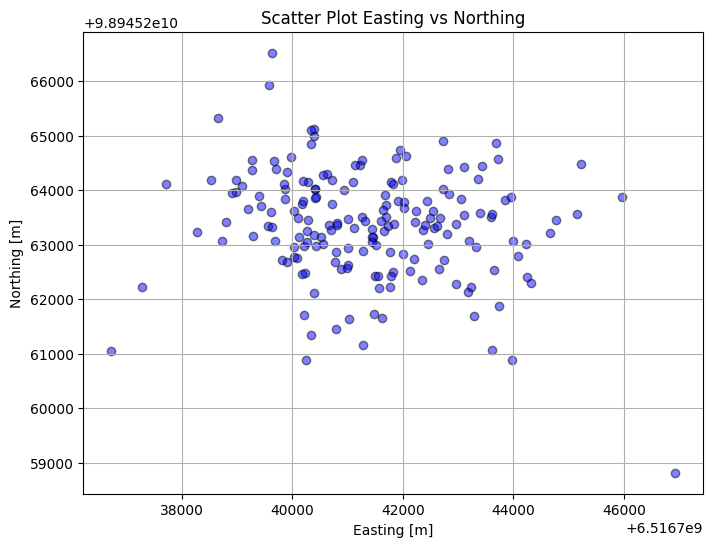

In [16]:
import matplotlib.pyplot as plt

# Scatter plot antara Easting dan Northing (koordinat)
plt.figure(figsize=(8,6))
plt.scatter(df['Easting [m]'], df['Northing [m]'], alpha=0.5, c='blue', edgecolors='k')
plt.xlabel('Easting [m]')
plt.ylabel('Northing [m]')
plt.title('Scatter Plot Easting vs Northing')
plt.grid(True)
plt.show()


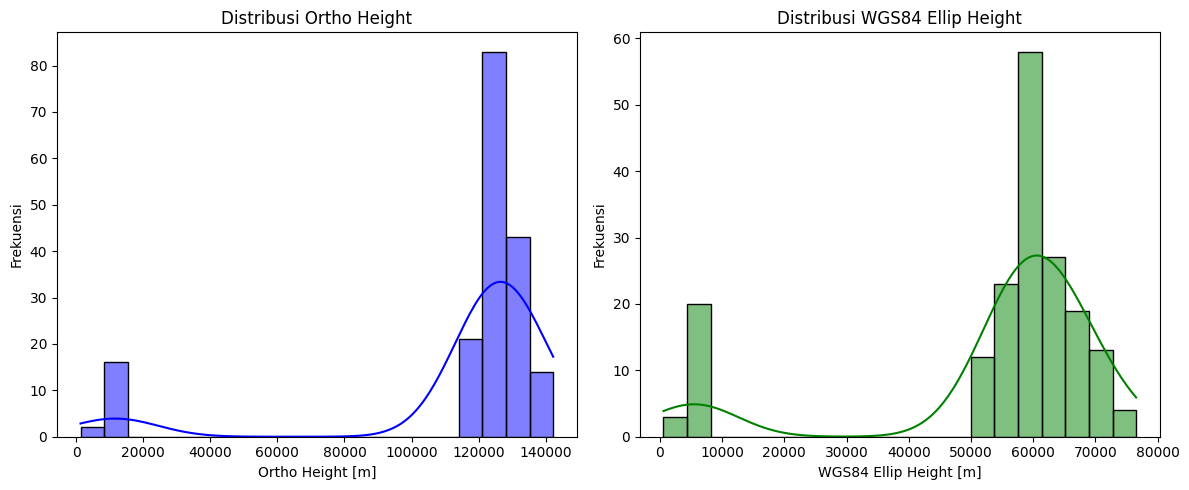

In [17]:
import seaborn as sns

# Plot histogram untuk Ortho Height dan WGS84 Ellip Height
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['Ortho Height [m]'], bins=20, kde=True, color='blue')
plt.xlabel('Ortho Height [m]')
plt.ylabel('Frekuensi')
plt.title('Distribusi Ortho Height')

plt.subplot(1,2,2)
sns.histplot(df['WGS84 Ellip Height [m]'], bins=20, kde=True, color='green')
plt.xlabel('WGS84 Ellip Height [m]')
plt.ylabel('Frekuensi')
plt.title('Distribusi WGS84 Ellip Height')

plt.tight_layout()
plt.show()


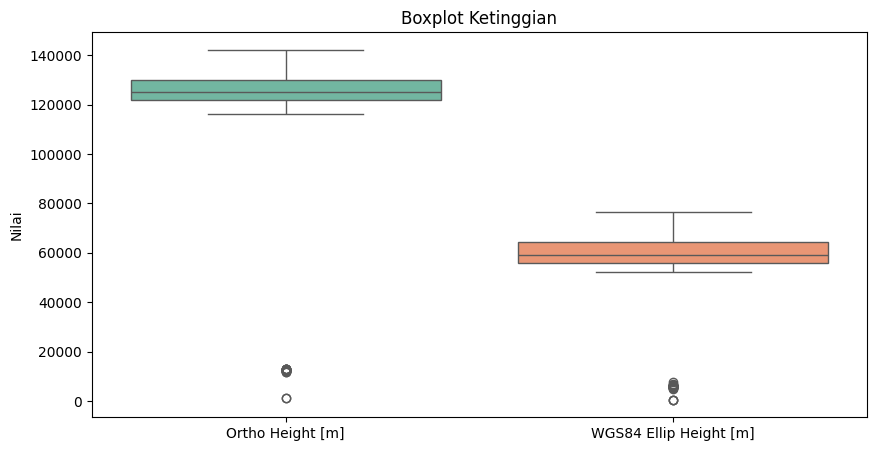

In [18]:
plt.figure(figsize=(10,5))

sns.boxplot(data=df[['Ortho Height [m]', 'WGS84 Ellip Height [m]']], palette="Set2")

plt.title('Boxplot Ketinggian')
plt.ylabel('Nilai')
plt.xticks([0, 1], ['Ortho Height [m]', 'WGS84 Ellip Height [m]'])

plt.show()


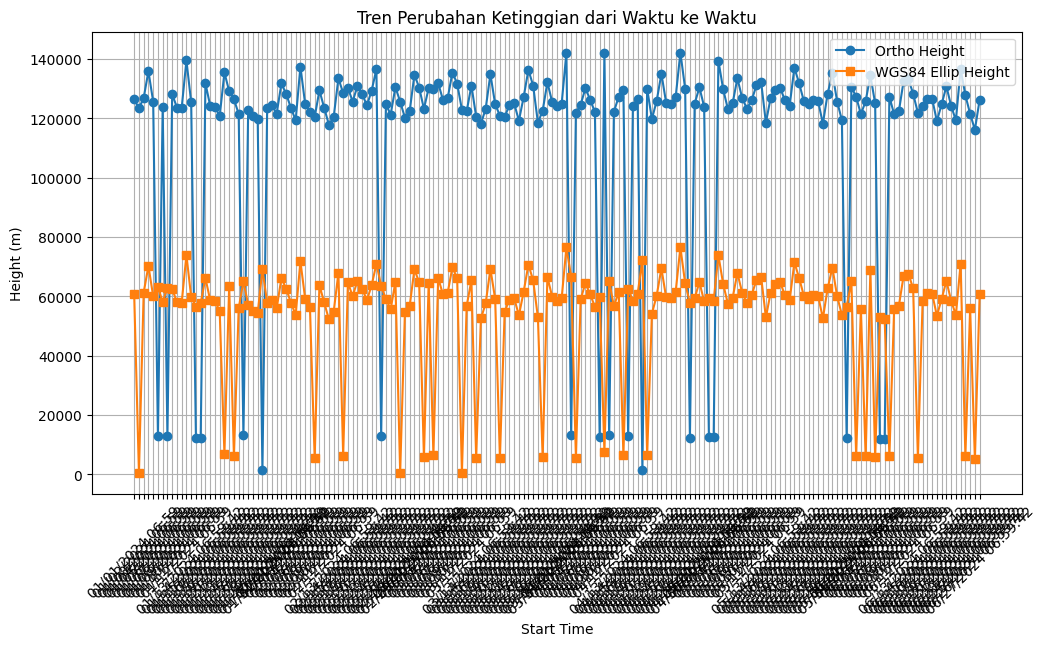

In [19]:
plt.figure(figsize=(12,6))

plt.plot(df['Start Time'], df['Ortho Height [m]'], label='Ortho Height', marker='o')
plt.plot(df['Start Time'], df['WGS84 Ellip Height [m]'], label='WGS84 Ellip Height', marker='s')

plt.xlabel('Start Time')
plt.ylabel('Height (m)')
plt.title('Tren Perubahan Ketinggian dari Waktu ke Waktu')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

plt.show()


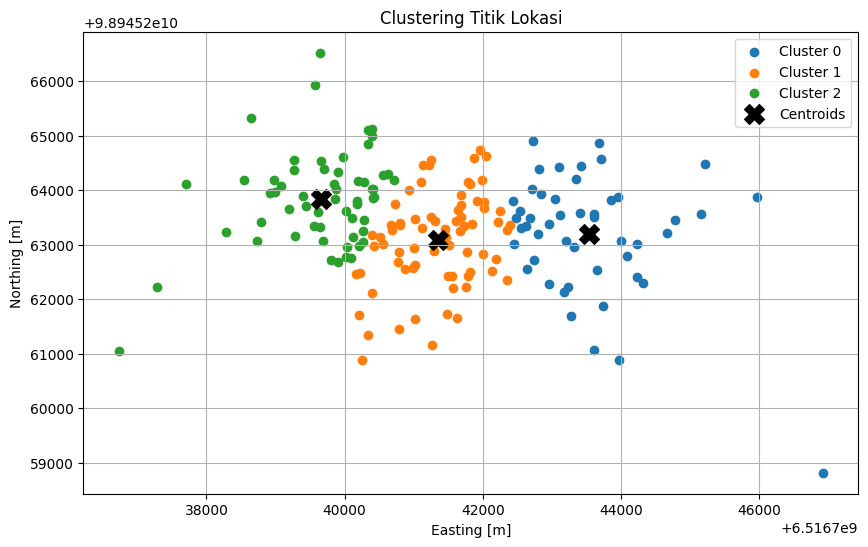

In [20]:
from sklearn.cluster import KMeans

# Tentukan jumlah cluster (misalnya 3)
num_clusters = 3

# Ambil data koordinat
X = df[['Easting [m]', 'Northing [m]']]

# Inisialisasi dan jalankan K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Plot hasil clustering
plt.figure(figsize=(10,6))
for cluster in range(num_clusters):
    plt.scatter(df[df['Cluster'] == cluster]['Easting [m]'],
                df[df['Cluster'] == cluster]['Northing [m]'], label=f'Cluster {cluster}')

# Tandai pusat cluster
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            color='black', marker='X', s=200, label='Centroids')

plt.xlabel('Easting [m]')
plt.ylabel('Northing [m]')
plt.title('Clustering Titik Lokasi')
plt.legend()
plt.grid()
plt.show()


In [21]:
print(df['Start Time'].head(20))  # Menampilkan 20 data pertama


0        01/01/2024 06:59
1        01/02/2024 06:59
2        01/03/2024 06:59
3        01/04/2024 06:59
4        01/05/2024 06:59
5        01/06/2024 06:59
6        01/07/2024 06:59
7        01/08/2024 06:59
8        01/09/2024 06:59
9        01/10/2024 06:59
10       01/11/2024 06:59
11       01/12/2024 06:59
12    01/13/2024 06:59:42
13    01/14/2024 06:59:42
14    01/15/2024 06:59:42
15    01/16/2024 06:59:42
16    01/17/2024 06:59:42
17    01/18/2024 06:59:42
18    01/19/2024 06:59:42
19    01/20/2024 06:59:42
Name: Start Time, dtype: object


In [22]:
df['Start Time'] = pd.to_datetime(df['Start Time'], errors='coerce')


In [23]:
print(df[df['Start Time'].isna()])


    Point Id Start Time  WGS84 Latitude []  WGS84 Longitude []   Easting [m]  \
12      cpdg        NaT          -0.953981          100.363117  6.516744e+09   
13      cpdg        NaT          -0.953981          100.363119  6.516745e+09   
14      cpdg        NaT          -0.953981          100.363114  6.516741e+09   
15      cpdg        NaT          -0.953981          100.363117  6.516741e+09   
16      cpdg        NaT          -0.953981          100.363117  6.516743e+09   
..       ...        ...                ...                 ...           ...   
174     cpdg        NaT          -0.953986          100.363119  6.516747e+09   
175     cpdg        NaT          -0.953981          100.363114  6.516740e+09   
176     cpdg        NaT          -0.953983          100.363117  6.516744e+09   
177     cpdg        NaT          -0.953983          100.363117  6.516744e+09   
178     cpdg        NaT          -0.953981          100.363117  6.516742e+09   

     Northing [m]  Ortho Height [m]  WG

In [24]:
df = df.sort_values(by='Start Time')


In [25]:
import pandas as pd

# Konversi 'Start Time' ke format datetime
df['Start Time'] = pd.to_datetime(df['Start Time'])

# Urutkan berdasarkan waktu
df = df.sort_values(by='Start Time')

# Set 'Start Time' sebagai index
df.set_index('Start Time', inplace=True)

# Lihat contoh data setelah diurutkan
print(df.head())


                    Point Id  WGS84 Latitude []  WGS84 Longitude []  \
Start Time                                                            
2024-01-01 06:59:00     cpdg          -0.953981          100.363117   
2024-01-02 06:59:00     cpdg          -0.953981          100.363117   
2024-01-03 06:59:00     cpdg          -0.953981          100.363114   
2024-01-04 06:59:00     cpdg          -0.953981          100.363114   
2024-01-05 06:59:00     cpdg          -0.953981          100.363114   

                      Easting [m]  Northing [m]  Ortho Height [m]  \
Start Time                                                          
2024-01-01 06:59:00  6.516743e+09  9.894526e+10          126485.0   
2024-01-02 06:59:00  6.516742e+09  9.894526e+10          123347.0   
2024-01-03 06:59:00  6.516740e+09  9.894526e+10          126916.0   
2024-01-04 06:59:00  6.516741e+09  9.894526e+10          135916.0   
2024-01-05 06:59:00  6.516739e+09  9.894526e+10          125667.0   

                  

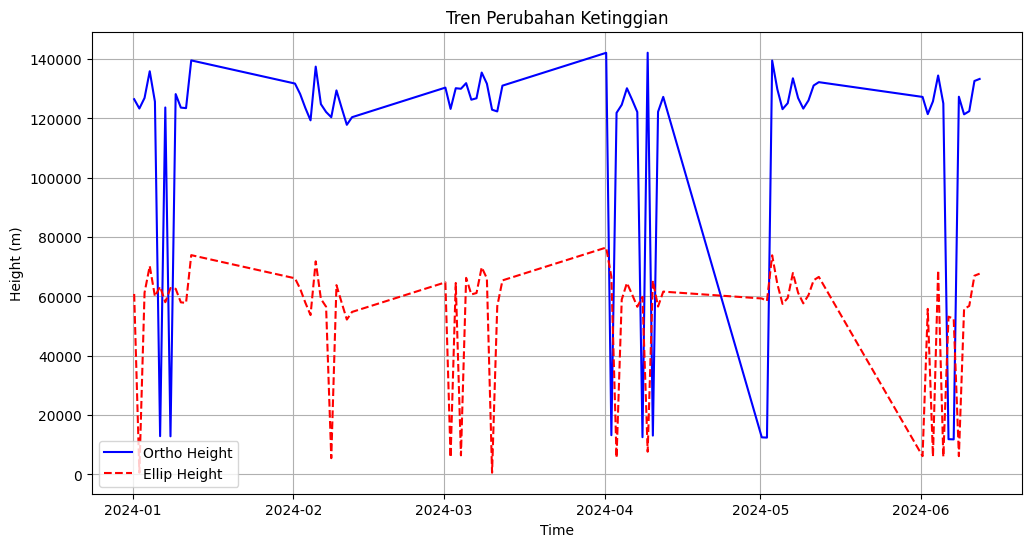

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df.index, df['Ortho Height [m]'], label='Ortho Height', color='blue')
plt.plot(df.index, df['WGS84 Ellip Height [m]'], label='Ellip Height', color='red', linestyle='dashed')

plt.xlabel('Time')
plt.ylabel('Height (m)')
plt.title('Tren Perubahan Ketinggian')
plt.legend()
plt.grid()
plt.show()


In [27]:
correlation = df[['Ortho Height [m]', 'WGS84 Ellip Height [m]']].corr()
print(correlation)


                        Ortho Height [m]  WGS84 Ellip Height [m]
Ortho Height [m]                1.000000               -0.081448
WGS84 Ellip Height [m]         -0.081448                1.000000


In [28]:
# Menambahkan kolom lain ke dalam analisis korelasi
correlation = df[['Ortho Height [m]', 'WGS84 Ellip Height [m]', 'Easting [m]', 'Northing [m]', 'Geoid Separation [m]']].corr()

print(correlation)


                        Ortho Height [m]  WGS84 Ellip Height [m]  Easting [m]  \
Ortho Height [m]                1.000000               -0.081448    -0.045881   
WGS84 Ellip Height [m]         -0.081448                1.000000     0.003214   
Easting [m]                    -0.045881                0.003214     1.000000   
Northing [m]                    0.012230                0.074330    -0.191061   
Geoid Separation [m]            0.007582               -0.025672     0.802919   

                        Northing [m]  Geoid Separation [m]  
Ortho Height [m]            0.012230              0.007582  
WGS84 Ellip Height [m]      0.074330             -0.025672  
Easting [m]                -0.191061              0.802919  
Northing [m]                1.000000             -0.064727  
Geoid Separation [m]       -0.064727              1.000000  


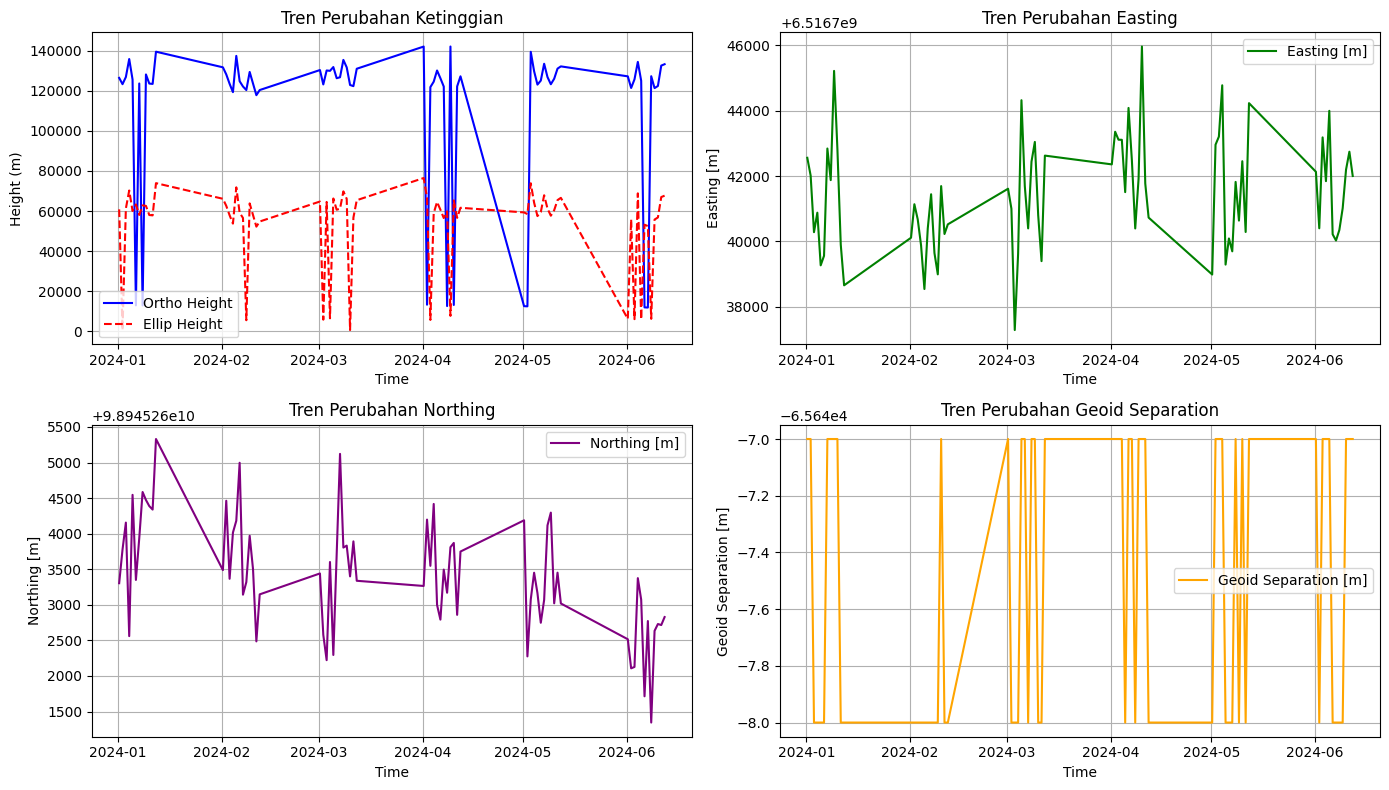

In [29]:
import matplotlib.pyplot as plt

# Visualisasi perubahan ketinggian dan posisi seiring waktu
plt.figure(figsize=(14, 8))

# Plot untuk perubahan ketinggian
plt.subplot(2, 2, 1)
plt.plot(df.index, df['Ortho Height [m]'], label='Ortho Height', color='blue')
plt.plot(df.index, df['WGS84 Ellip Height [m]'], label='Ellip Height', color='red', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Height (m)')
plt.title('Tren Perubahan Ketinggian')
plt.legend()
plt.grid()

# Plot untuk perubahan Easting
plt.subplot(2, 2, 2)
plt.plot(df.index, df['Easting [m]'], label='Easting [m]', color='green')
plt.xlabel('Time')
plt.ylabel('Easting [m]')
plt.title('Tren Perubahan Easting')
plt.legend()
plt.grid()

# Plot untuk perubahan Northing
plt.subplot(2, 2, 3)
plt.plot(df.index, df['Northing [m]'], label='Northing [m]', color='purple')
plt.xlabel('Time')
plt.ylabel('Northing [m]')
plt.title('Tren Perubahan Northing')
plt.legend()
plt.grid()

# Plot untuk perubahan Geoid Separation
plt.subplot(2, 2, 4)
plt.plot(df.index, df['Geoid Separation [m]'], label='Geoid Separation [m]', color='orange')
plt.xlabel('Time')
plt.ylabel('Geoid Separation [m]')
plt.title('Tren Perubahan Geoid Separation')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Misalkan kita memiliki data yang disiapkan dalam bentuk DataFrame df
# Pastikan data sudah disortir berdasarkan waktu (timestamp)

# Normalisasi data (contoh menggunakan MinMaxScaler)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Ortho Height [m]', 'WGS84 Ellip Height [m]', 'Easting [m]', 'Northing [m]', 'Geoid Separation [m]']])

# Membuat generator untuk data time-series
look_back = 10  # Menggunakan 10 data sebelumnya untuk memprediksi data berikutnya
generator = TimeseriesGenerator(scaled_data, scaled_data, length=look_back, batch_size=32)

# Membangun model PLSTM
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(look_back, scaled_data.shape[1])))
model.add(Dropout(0.2))  # Menghindari overfitting
model.add(Dense(32, activation='relu'))
model.add(Dense(scaled_data.shape[1]))  # Output layer untuk setiap variabel yang diprediksi
model.compile(optimizer='adam', loss='mean_squared_error')

# Melatih model
model.fit(generator, epochs=50, verbose=1)

# Prediksi untuk data uji (test data)
predictions = model.predict(generator)

# Kembalikan prediksi ke skala asli
predictions_rescaled = scaler.inverse_transform(predictions)


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.4315
Epoch 2/50


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3566 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2778 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1602 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1159 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1198 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1072 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0972 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0976 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0990 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1028 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0920 
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0981 
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0884 
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0994 
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0858 
Epoch 17/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/

In [59]:
pip install tensorflow-addons==0.20.0


     ------------------------------------ 736.6/736.6 kB 516.6 kB/s eta 0:00:00
  Attempting uninstall: tensorflow-addons
    Found existing installation: tensorflow-addons 0.22.0
    Uninstalling tensorflow-addons-0.22.0:
      Successfully uninstalled tensorflow-addons-0.22.0
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [64]:
pip install tensorflow-addons


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pip show tensorflow tensorflow-addons


Name: tensorflow-addons
Version: 0.20.0
Summary: TensorFlow Addons.
Home-page: 
Author: Google Inc.
Author-email: opensource@google.com
License: Apache 2.0
Location: c:\users\user\appdata\local\programs\python\python310\lib\site-packages
Requires: packaging, typeguard
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np

# Menyiapkan data contoh
# Asumsikan 'data' adalah array numpy yang sudah diolah dari CSV kamu
# Contoh data, ubah dengan data asli yang kamu punya
X_train = np.random.randn(100, 10, 4)  # 100 samples, 10 timesteps, 4 fitur (misalnya Easting, Northing, Ortho Height, dll)
y_train = np.random.randn(100, 1)  # Target output (misalnya prediksi penurunan tanah)

# Membangun model PLSTM
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))  # Output layer

# Compile dan latih model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Simpan model ke file
model.save('model_plstm.h5')  # Menyimpan model ke file .h5


In [77]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Pastikan data uji tersedia
y_true = y_test  # Label asli dari data uji
y_pred = model.predict(X_test)  # Prediksi dari model

# Jika model regresi, konversi ke kelas (misalnya, dengan threshold 0.5)
y_pred_class = np.argmax(y_pred, axis=1)  # Jika model klasifikasi multi-kelas
y_true_class = np.argmax(y_true, axis=1)  # Pastikan label asli juga dalam bentuk class

# Buat confusion matrix
cm = confusion_matrix(y_true_class, y_pred_class)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


NameError: name 'y_test' is not defined